#Cách 1:

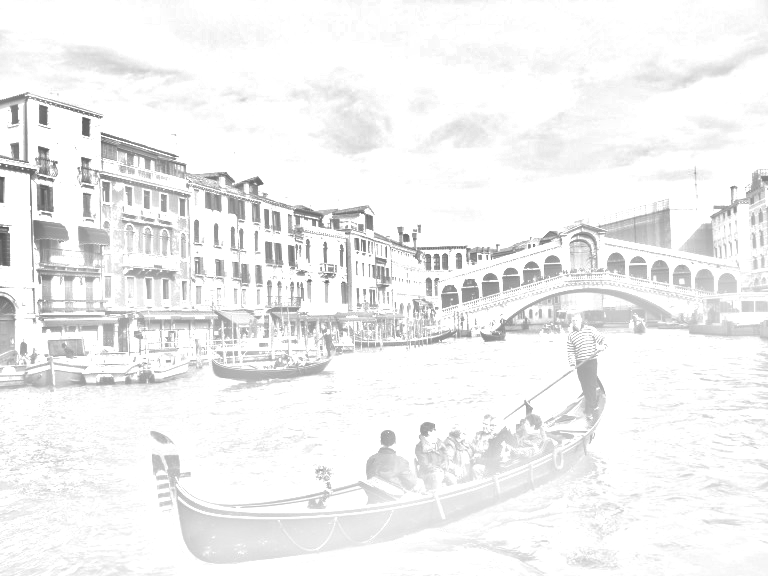

In [1]:
# Python program to Convert Image into sketch


# import all the required modules
import numpy as np
import imageio
import scipy.ndimage
import cv2
from google.colab.patches import cv2_imshow

# take image input and assign variable to it
img = "/content/venice.jpg"


# function to convert image into sketch
def rgb2gray(rgb):
	# 2 dimensional array to convert image to sketch
	return np.dot(rgb[..., :3], [0.2989, 0.5870, .1140])


def dodge(front, back):

	# if image is greater than 255 (which is not possible) it will convert it to 255
	final_sketch = front*255/(255-back)
	final_sketch[final_sketch > 255] = 255
	final_sketch[back == 255] = 255

	# to convert any suitable existing column to categorical type we will use apect function
	# and uint8 is for 8-bit signed integer
	return final_sketch.astype('uint8')


ss = imageio.imread(img)
gray = rgb2gray(ss)

i = 255-gray


# to convert into a blur image
blur = scipy.ndimage.filters.gaussian_filter(i, sigma=21)


# calling the fuction
r = dodge(blur, gray)

cv2_imshow(r)

#Cách 2:

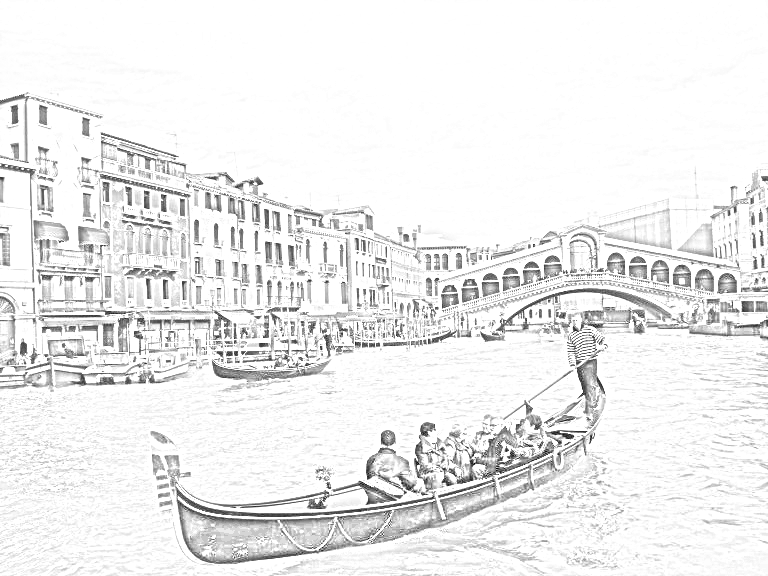

In [2]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/venice.jpg')  # loads an image from the specified file
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (21, 21), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2_imshow(sketch)
# cv2.imwrite("sketch.png", sketch)  # converted image is saved as mentioned name

#Cách 3:

In [3]:
!pip install MedPy
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import util
from skimage import img_as_float
import matplotlib.pylab as plt
from medpy.filter.smoothing import anisotropic_diffusion
from skimage.filters import gaussian, threshold_otsu
import cv2 as cv

     |████████████████████████████████| 151 kB 5.3 MB/s 
     |████████████████████████████████| 48.4 MB 26 kB/s 
  Created wheel for MedPy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754464 sha256=9baa08263b7b573b0c901a0cb1dbcfa7cddd60f9c969d32116e30cfe996ffba4
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built MedPy


In [4]:
def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))
def sketch(img, edges):
    output = np.multiply(img, edges)
    output[output>1]=1
    output[edges==1]=1
    return output
def edges_with_anisotropic_diffusion(img, niter=100, kappa=10, gamma=0.1):
    output = img - anisotropic_diffusion(img, niter=niter, \
            kappa=kappa, gamma=gamma, voxelspacing=None, \
            option=1)
    output[output > 0] = 1
    output[output < 0] = 0
    return output
def sketch_with_dodge(img):
 orig = img
 blur = gaussian(util.invert(img), sigma=20)
 result = blur / util.invert(orig) 
 result[result>1] = 1
 result[orig==1] = 1
 return result

def edges_with_dodge2(img):
 img_blurred = gaussian(util.invert(img), sigma=5) 
 output = np.divide(img, util.invert(img_blurred) + 0.001)
 output = normalize(output)
 thresh = threshold_otsu(output)
 output = output > thresh
 return output
def edges_with_DOG(img, k = 200, gamma = 1):
    sigma = 0.5
    output = gaussian(img, sigma=sigma) - gamma*gaussian(img, \
                      sigma=k*sigma)
    output[output > 0] = 1
    output[output < 0] = 0 
    return output
def sketch_with_XDOG(image, epsilon=0.01):
    phi = 10
    difference = edges_with_DOG(image, 200, 0.98).astype(np.uint8)
    ht=0
    for i in range(0, len(difference)):
        for j in range(0, len(difference[0])):
            if (difference[i][j] >= 0.01).any:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi*(difference[i][j] - epsilon))
            difference[i][j] = 1 + ht
    difference = normalize(difference) 
    return difference

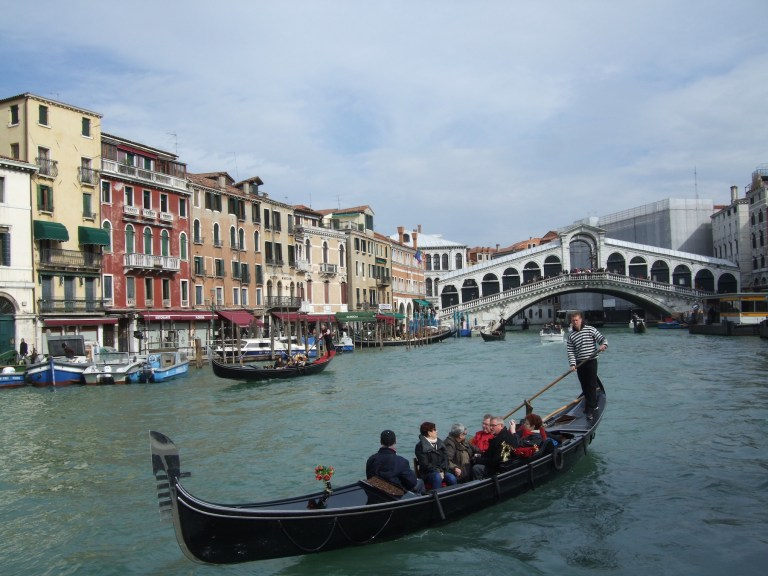

/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by

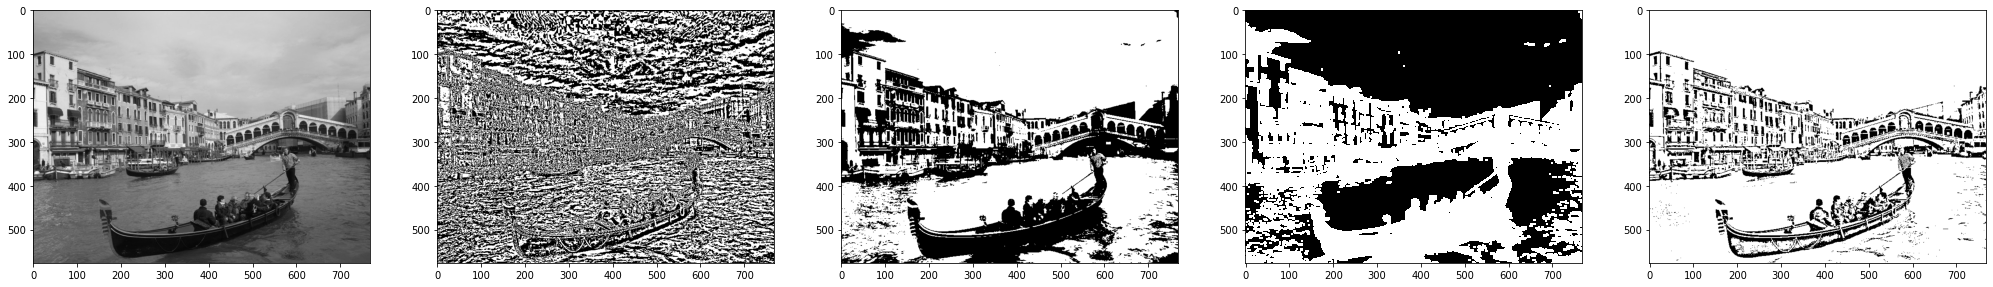

In [5]:
def plot_img(img, size=(7,7), title=""):
    cmap = "gray" if len(img.shape) == 2 else None
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

def plot_imgs(imgs, cols=5, size=7, title=""):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        cmap="gray" if len(img.shape) == 2 else None
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
    plt.suptitle(title)
    plt.show()

img1=cv.imread('/content/venice.jpg')
img=img1.copy()
cv2_imshow(img)
f = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
m=edges_with_anisotropic_diffusion(f, niter=100, kappa=10, gamma=0.1)

k=edges_with_DOG(f,200,0.98)
j=sketch_with_XDOG(f, epsilon=0.01)
m1=sketch_with_dodge(f)
i=edges_with_dodge2(f)
#plt.imshow(i,cmap='gray' )
plot_imgs([f,m,k,sketch(j,k),sketch(m1,i)])